# Simulating monodisperse PHAs - walkthrough

This notebook will cover how to build polymers and run simulations of polhydroxyalkanotes from pre-generated parameters.

The associated documentation **https://polymersimulator.readthedocs.io** will contain much more detailed information on:

- How to build and parameterize any polymer
- How to run simulations in openmm using **Amber** or **Gromacs** inputs
- How to analyse simulations
- And much more...

However, the focus here will be on getting to simulations of PHAs as quickly as possible using the parameters already generated which can be found in the cloned repository:

    NEED TO UPLOAD FILES TO GITHUB AND MENTION WHERE THEY ARE FOUND 

# 1. What PHAs are included?

Before running any code, 30 different PHAs have already been parameterized and can be found here:

https://polymersimulator.readthedocs.io/en/latest/simulating_phas.html#taking-a-look-at-pre-parameterized-phas

# 2. Import modules

A range of python modules have been developed for this package (and are explained in more detail with their own documentation), however, many of them are not needed for this notebook. 

To buuld polymers, 3 different modules are required:

- sw_directories
- sw_build_systems
- os

**sw_directories**: A filepath manager that can load and save different parameters for systems.

**sw_build_systems**: A module containing different classes to build polymers, create systems and save parameters.

**os**: Obtains filepath to base directory to initialise filepath manager.

In [1]:
# Import required modules
from modules.sw_directories import *
from modules.sw_build_systems import *
import os as os

# 3. Initialise manager and builder objects

Now the modules are loaded, 2 different classes are called **PolySimManage** and **BuildAmberSystems** to create the **manager** and **builder** objects.

<div class="alert alert-block alert-info">
<b>Note:</b> In Python, these objects are called **classes**.  
Classes can contain **functions**, which are called **methods**, that define the behaviors of the objects.
</div>

In [2]:
# Initialise manager and builder
manager = PolySimManage(os.getcwd()) # comes from the sw_directories module
builder = BuildAmberSystems(manager) # comes from the sw_build_systems module

# 4. Build a polymer

To build a polymer, 2 things are required:

- Name of the base_trimer
- Length of the desired polymer
 
<div class="alert alert-block alert-info">
<b>Note:</b> All PHAs have been parameterized using GAFF2 and abcg2 charges
</div>

## 4.1. Inputs

### Name of the base trimer

The name of the base trimer is required because PHAs are built from **head**, **mainchain** and **tail** units derived from trimers - by giving the base_trimer name, the **manager**
object will be able to load the required units to build the polymer. The format follows this pattern:

```python
   prefix = "3HB" # or "4HB", "5HV", "3H4MeV", etc...
   trimer_base_name = f"{prefix}_trimer"
```
With available **prefixes** given in **bold** the list of pre-parameterized PHAs: https://polymersimulator.readthedocs.io/en/latest/simulating_phas.html#taking-a-look-at-pre-parameterized-phas

### Length of the desired polymer

This is straight forward, to buid a polymer with 10 units define a variable, **poly_len** as so:

```python
   poly_len = 10
```
This can be any number (although it is probably not a good idea to build a 1000000-mer)


In [3]:
# Name the trimer base name and the number units the final polymer will include
prefix = "3HB"                      
trimer_base_name = f"{prefix}_trimer" 
number_of_units = 10                 

## 4.2. Building a polymer pdb file

The next step is building the polymer. The 2 variables just defined are passed to the **gen_polymer_pdb_and_params** method of the builder class and the outputs are assigned to a variable named **polymer**

```python
   polymer = builder.gen_polymer_pdb_and_params(base_name=trime_base_name, number_of_units=number_of_units)
```
<div class="alert alert-block alert-info">
<b>Note:</b>The output from this function is a pdb file and amber topology/coordinate files, the uses of these files are explained further on in the notebook.
</div>

In [4]:
# Build the polymer using the trimer_base_name and number_of_units
polymer = builder.gen_polymer_pdb_and_params(base_name=trimer_base_name, number_of_units=number_of_units)

Current directory: /home/dan/polymersimulator/pdb_files/molecules/3HB_trimer
Output: -I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/prep to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/lib to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm to search path.
-I: Adding /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd to search path.
-f: Source 3HB_10_polymer.intleap.

Welcome to LEaP!
(no leaprc in search path)
Sourcing: ./3HB_10_polymer.intleap
Loading Prep file: ./head_3HB_trimer.prepi
Loading Prep file: ./mainchain_3HB_trimer.prepi
Loading Prep file: ./tail_3HB_trimer.prepi
----- Source: /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff
----- Source of /home/dan/miniconda3/envs/AmberTools23/dat/leap/cmd/leaprc.gaff done
Log file: ./leap.log
Loading parameters: /home/dan/miniconda3/envs/AmberTools23/dat/leap/parm/gaff.dat
Reading title:
AMBER General Force Field for organic molecules (Version 1.81, May 

### What does this polymer variable contain?

The variable **polymer** assigned to output contains 3 things (as a tuple):

- pdb filepath
- amber topology filepath
- amber coordinates filepath

For example:

```python
   pdb_filepath, amber_top, amber_coord = polymer
```
These filepaths can be printed out as shown below.

In [5]:
print(f"""
    Polymer built using units parameterized for: {trimer_base_name}

    The pdb file can be found at: {polymer[0]}

    The amber topology file can be found at: {polymer[1]}

    The amber coordinate file can be found at: {polymer[2]}""")


    Polymer built using units parameterized for: 3HB_trimer

    The pdb file can be found at: /home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer/3HB_10_polymer.pdb

    The amber topology file can be found at: /home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer/3HB_10_polymer.prmtop

    The amber coordinate file can be found at: /home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer/3HB_10_polymer.rst7


<div class="alert alert-block alert-info">
<b>Note:</b> The amber topolgy and coordinate filepaths could immediately be passed to the simulation class (discussed later on), but no example for running a simulation of a single polymer will be given in this notebook as simulations of single polymers are not particularly useful.
</div>

### What is the name of the constructed polymer?

The naming convention of constructed polymers follows a similar format to that of the trimer, with some key differences.

```python
   prefix = "3HB" # or "4HB", "5HV", "3H4MeV", etc...
   poly_len = 10
   polymer_name = f"{prefix}_{str(poly_len)}_polymer"
```
This is the same for all constructed polymers and can be seen in the previous code cell by the names assigned to the output files.

Of course it is easier to just define the polymer name in one line:

```python
   polymer_name = "3HB_10_polymer"
```

### Calling files and information using the polymer name

Whilst not important to this notebook, there may be workflows where you want to load specific files or information for a polymer - these methods always involve passing only the name of a polymer to a given method. These methods are part of the **manager** class, and this class knows which directories to try and locate the files in.

#### Fetching a polymer pdb filepath

Fetching the pdb filepath for a polymer allows the pdb file to be utilised easily in other workflows.

```python
   pdb = manager.load_pdb_filepath("3HB_10_polymer")
```

### Fetching topologies and coordinates for AMBER/GROMACS simulations of a single polymer

This is extremely useful when running simulations, a predefined simulation workflow can be provided with only the name of a polymer and have the ability to load the correct input files.

```python
   amb_top, amb_coord = manager.load_amber_filepaths("3HB_10_polymer")
   gro_top, gro_coord = manager.load_gromacs_filepaths("3HB_10_polymer")
```
Of course, it is not super useful to run simulations of a single polymer, but there may be cases where this functionality may be useful to you.

<div class="alert alert-block alert-info">
<b>Note:</b> At this stage in this notebook, amber files have been generated for the polymer but GROMACS files have not. So if you encounter an error when trying to load GROMACS filepaths, do not panic - this is expected. It is also important to mention at this point the methodology is the same for loading the reuqired files for simulations of constructued systems containing multiple polymers. Polymer system naming will be described further on in this notebook.
</div>

### Fetching smiles of a polymer

The smiles for a given polymer can also be loaded.

```python
   smiles = manager.load_smiles("3HB_10_polymer")
```

### Fetching residue codes of a polymer

It has not been mentioned at this stage, but each polymer unit (**head**, **mainchain** and **tail**) has a unique residue code assigned to it during the parameterization process. You may not know what the residue codes for each unit is (as they are generated during parameterization) but they can be found easily.

```python
   manager.retrieve_polymeric_rescodes("3HB_10_polymer")
```
<div class="alert alert-block alert-info">
<b>Note:</b> Try running these functions in the cells below and see what the output is.
</div>

In [6]:
# Fetch pdb_filepath

In [7]:
# Fetch amber_filepaths

In [8]:
# Fetch gromacs_filepaths

In [9]:
# Fetch smiles

In [10]:
# Fetch rescodes

# Step 5. Building an amorphous system of polymers

Now a polymer has been built polymer systems of multiple instances of this polymer can be packed using polyply.

## Step 5.1 Converting from amber --> gromacs format

Before using polyply, the amber topologies and coordinates must be converted into a GROMACS format (polyply is part of the GROMACS family of tools). A method exists in the **builder** class called **run_acpype** that carries out this conversion for you. It requires 3 inputs:

- Name: polymer name
- Top: amber topology filepath (output when building a polymer)
- Coord: amber coordinate filepath (output when building a polymer)

```python
   builder.run_acpype(name, top, coord)
```

In [11]:
# Define polymer name
polymer_name = "3HB_10_polymer"

# Retrieve amber files
amb_top, amb_coord = manager.load_amber_filepaths("3HB_10_polymer")

In [12]:
# Convert to GROMACS format
builder.run_acpype(name=polymer_name, top=amb_top, coord=amb_coord)

 
            Return code: 0
            STDOUT: ============================================================================
| ACPYPE: AnteChamber PYthon Parser interfacE v. 2023.10.27 (c) 2025 AWSdS |
Converting Amber input files to Gromacs ...
==> Writing GROMACS files

==> Disambiguating lower and uppercase atomtypes in GMX top file, even if identical.

==> Writing GMX dihedrals for GMX 4.5 and higher.

Total time of execution: less than a second

            

            Succesful conversion of Amber --> Gromacs format for 3HB_10_polymer.


## Step 5.2 Building a system with polyply

To build a system with polyply 2 things are required:

- List of polymers you wish to pack
- List of the number of each polymer you wish to pack

As an example:
```python
   polymer_names = ["3HB_10_polymer"]
   number_of_polymers = [25]
```
In this case a system containing 25 3HB_10_polymers will be packed.

<div class="alert alert-block alert-info">
<b>Note:</b> Whilst this example only packs 1 type of polymer, additional items can be added to each list to pack additional (different) polymers and different amounts of those polymers.
</div>

In [13]:
# Define polymers and number of each polymer you wish to pack
polymer_names = ["3HB_10_polymer"]
number_of_polymers = [25]

Now the **run_polyply** can be used with these arguments.

```python
   system_name, gro_top, gro_coord, gro_itp = builder.run_polyply(polymer_names=polymer_names, num_poly=number_of_polymers, dens=750)
```

<div class="alert alert-block alert-info">
<b>Note:</b> Besides the two lists defined, an additional argument - dens - is also passed to the function. This is in mg/ml, so a dens of 750 will result in a density of 0.75 g/ml with the rationale for this explained in further detail later on.
</div>

In [14]:
# Generate system with polyply
system_name, gro_top, gro_coord, gro_itp = builder.run_polyply(polymer_names=polymer_names, num_poly=number_of_polymers, dens=750)

/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_25_amorph/3HB_10_polymer_25_amorph.top
/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_25_amorph/3HB_10_polymer_25_amorph.gro
✅ Combined 1 files into /home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_25_amorph/3HB_10_polymer_25_amorph.itp
 
            Return code: 0
            STDOUT: 
            
Setting the LD random seed to -100765953

Generated 36 of the 36 non-bonded parameter combinations

Generated 36 of the 36 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type '3HB_10_polymer'

Excluding 3 bonded neighbours molecule type '3HB_10_polymer'
Analysing residue names:
There are:   250      Other residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 32x32x32, spacing 0.114 0.114 0.114

Estimate for the relative computational load of the PME mesh part: 0.19

This run wil

### Outputs from building a polyply system

- **system_name**: The name of the system
- **gro_top**: the topology file (master topology)
- **gro_coord**: the coordinates of the system
- **gro_itp**: the secondary topology file

### Why are there two topology files?

The 2 topology files are **.top** and **.itp** can be considered as one entity. The **.top** file includes information about the number of polymers packed into each system and the **.itp** file
contains the topological and parameter information of the polymers. More simply, **.top** contains the instructions and **.itp** contains the actual parameters. Luckily, the **.itp** file can be ignored as it is called by the **.top** file. (hence why they can be considered the same entitiy)

### How are systems named?

The systems generated by polyply are named intuitively as so:

```python
    "{polymer_name_1}_{number_of_polymer_1}_{polymer_name_2}_{number_of_polymer_2}_{polymer_name_x}_{number_of_polymer_x}_amorph"
```
So an example for this system is
```python
   "3HB_10_polymer_25_amorph"
```
This gets more complicated the more polymers there are in the system and may need some rethinking later on down the line.

### Printing these outputs 

In [15]:
# Print out information about the system packed with polyply
print(f"""Information about the generated system.

    System_name: {system_name}

    Polymers in system: {polymer_names}
    Number of each polymer in system: {number_of_polymers}

    The generated files can be found at:

    gromacs master topology: {gro_top}
    gromacs coordinates: {gro_coord}
    gromacs polymer topolgies: {gro_itp}
    """)

Information about the generated system.

    System_name: 3HB_10_polymer_25_amorph

    Polymers in system: ['3HB_10_polymer']
    Number of each polymer in system: [25]

    The generated files can be found at:

    gromacs master topology: /home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_25_amorph/3HB_10_polymer_25_amorph.top
    gromacs coordinates: /home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_25_amorph/3HB_10_polymer_25_amorph.gro
    gromacs polymer topolgies: /home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_25_amorph/3HB_10_polymer_25_amorph.itp
    


## Step 5.3. Commonly ecountered errors when running simulations of polyply packed systems

In the related documentation a figure explains the issues with some starting structures. Polyply uses a backmapping approach (atomistic --> CG --> packing --> atomistic) and this can lead atoms being very close to eachother and initial systems can have rather large initial repulsive forces
leading to an error like this one:

```python
   OpenMMException: Particle coordinate is NaN.  For more information, see https://github.com/openmm/openmm/wiki/Frequently-Asked-Questions#nan
```
This error is especially prominent the closer a system is packed to a density of 1 g/ml - as there is much more possibility that atoms are too close to eachother, causing the simulation to crash. Since an amorphous structure is desired, it is important to still pack to a high density but to avoid perpetual errors, a target density of 0.75 g/ml is used as the default to create a rather packed amorphous system that simulations can be carried out with. 

However, this error does still persist even at the lower densities of 0.75 g/ml, sometimes.....

The solution for this is to run an iterative function:

- 1: Generate System with polyply
- 2: Run small test simulation
      - If simulation encounters the error - restart
      - If simulation, save structure and topology

This ensures any simulation that is run in a HPC, will be intialised with no issues.

/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_25_amorph/3HB_10_polymer_25_amorph.top
/home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_25_amorph/3HB_10_polymer_25_amorph.gro
✅ Combined 1 files into /home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_25_amorph/3HB_10_polymer_25_amorph.itp
 
            Return code: 0
            STDOUT: 
            
Setting the LD random seed to 2067262458

Generated 36 of the 36 non-bonded parameter combinations

Generated 36 of the 36 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type '3HB_10_polymer'

Excluding 3 bonded neighbours molecule type '3HB_10_polymer'
Analysing residue names:
There are:   250      Other residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 32x32x32, spacing 0.114 0.114 0.114

Estimate for the relative computational load of the PME mesh part: 0.19

This run wil

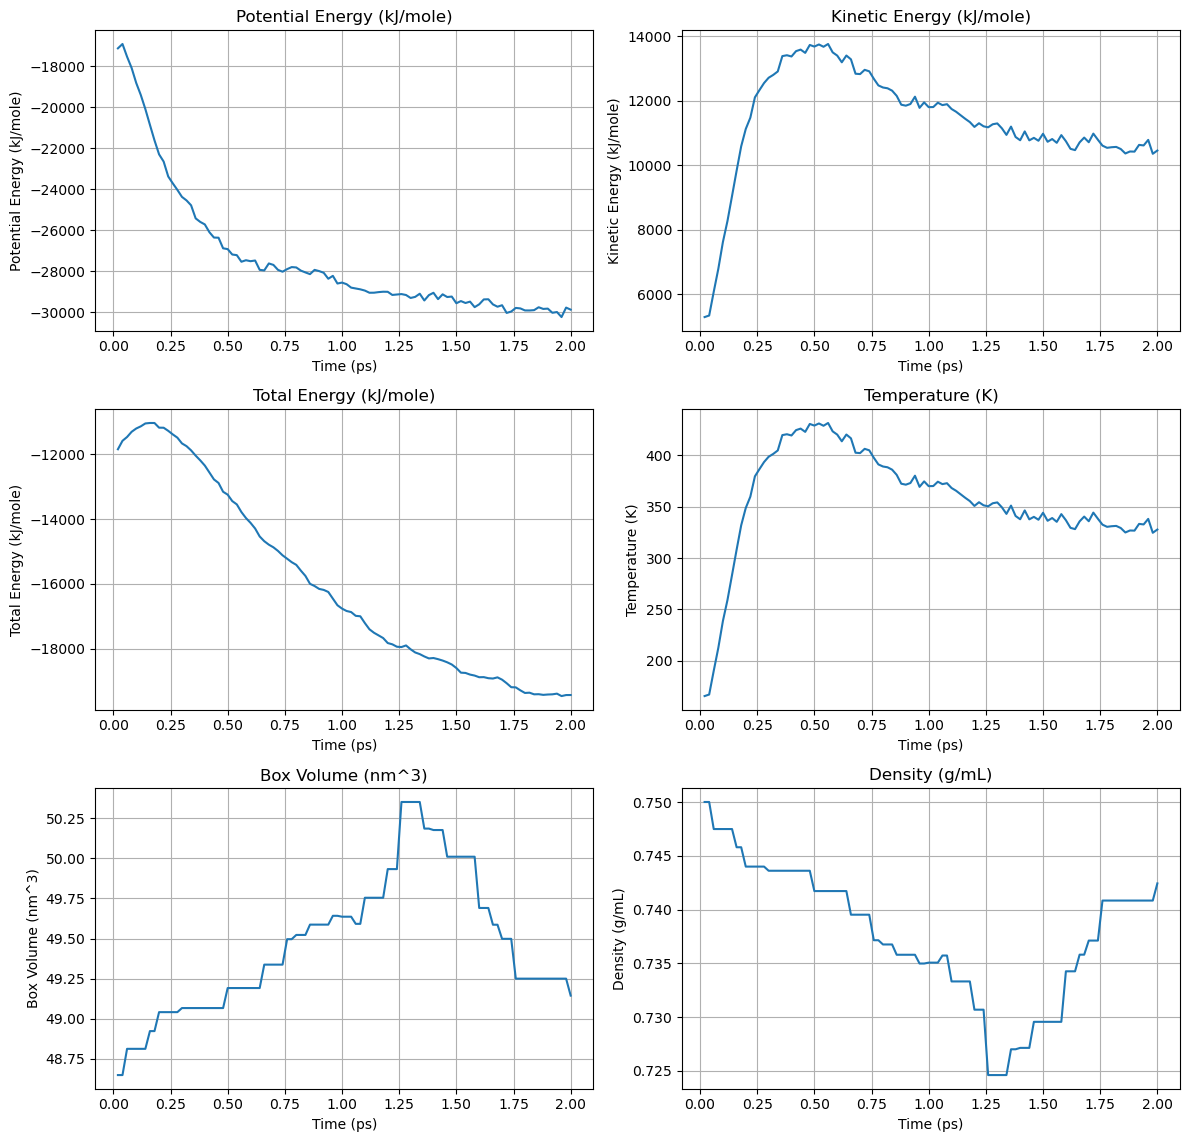


Restarting.... simulation geometry imposing too many forces....
name 'succesful_polymers' is not defined

Starting system found in 3 attempts


In [16]:
system_name, gro_top, gro_coord, gro_itp = builder.find_polyply_starting_structure(polymer_names=polymer_names, num_poly=number_of_polymers, dens=750, max_attempts=100)

The outputs of this function are the same as those seen in step 6.2, they are intterogated below.

In [17]:
# Print out information about the system packed with polyply
print(f"""Information about the generated system.

    System_name: {system_name}

    Polymers in system: {polymer_names}
    Number of each polymer in system: {number_of_polymers}

    The generated files can be found at:

    gromacs master topology: {gro_top}
    gromacs coordinates: {gro_coord}
    gromacs polymer topolgies: {gro_itp}
    """)

Information about the generated system.

    System_name: 3HB_10_polymer_25_amorph

    Polymers in system: ['3HB_10_polymer']
    Number of each polymer in system: [25]

    The generated files can be found at:

    gromacs master topology: /home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_25_amorph/3HB_10_polymer_25_amorph.top
    gromacs coordinates: /home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_25_amorph/3HB_10_polymer_25_amorph.gro
    gromacs polymer topolgies: /home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_25_amorph/3HB_10_polymer_25_amorph.itp
    


# Step 7. Runnning simulations of this system

Now the system has been generated and a stable starting structure acquired, openmm simualtions can be ran.

The first stage is to import the openmm module.

In [18]:
# Import openmm module
from modules.sw_openmm import *

The required files have already been defined and these are:

- **gro_top**
- **gro_coord**

The are passed to a class called **GromacsSimulation** - along with the **manager** object - which will construct an openmm simulation object with some useful built in methods that can be called

This **GromacsSimulation** object is assigned to a variable called **sim**, so that the different methods can be called easily.

<div class="alert alert-block alert-info">
<b>Note:</b> The manager object is also passed so that a simulation folder for this specfic simulation can be constructed.
</div>

In [19]:
# Load gromacs topology and coordinates
gro_top, gro_coord = manager.load_gromacs_filepaths("3HB_10_polymer_25_amorph")

In [20]:
# Intialise simulation
sim = GromacsSimulation(manager, gro_top, gro_coord)

### What does this simulation object include?

A lot of simulation methods are included within this object, but the important thing here a the default simulation parameters, an example of how to see what these defaults are is shown below.

In [21]:
# Print out simulation parameters
print(f"""Parameters for simulation of: {sim.filename}

    Timestep (fs): {sim.timestep}
    Temperature (k): {sim.temp}
    Pressure (atm): {sim.pressure}
    Total steps: {sim.total_steps}
    Nonbonded cutoff (A): {sim.nonbondedcutoff}

    The files used to construct this simulation are:

    Topology: {sim.topology_file}
    Coordinates: {sim.coordinates_file}
    """)
    

Parameters for simulation of: 3HB_10_polymer_25_amorph

    Timestep (fs): 2.0
    Temperature (k): 300
    Pressure (atm): 1
    Total steps: 1000
    Nonbonded cutoff (A): 1.0

    The files used to construct this simulation are:

    Topology: /home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_25_amorph/3HB_10_polymer_25_amorph.top
    Coordinates: /home/dan/polymersimulator/pdb_files/systems/3HB_10_polymer_25_amorph/3HB_10_polymer_25_amorph.gro
    


### What about changing these parameters?

To change the parameters there are a series of methods embedded in the assigned **sim** variable. 

```python
   sim.set_total_steps(total_steps)
   sim.set_temperature(temperature)
   sim.set_pressure(pressure)
   sim.set_timestep(timestep)
```

There are few different varaibles that can be assigned but these are the most important ones that are critical to be aware of.

### Where are simulation files saved?

The final thing to be aware of before a simulation is carried out is, **where will the files be saved?**

The manager object handles the creation of a simulation directory and saving the filepaths of the outputted simulations and the constructucted filepath will follow this general form:

```python
   sim_dir = f"~polymersimulator/pdb_files/systems/{system_name}/{date_and_timestamp}"
```
So for the system that was previously built, the filepath to directory containing simulation outputs will be:

```python
   sim_dir = "~polymersimulator/pdb_files/systems/3HB_10_polymer_25_amorph/2025-01-01_0000"
```
<div class="alert alert-block alert-info">
<b>Note:</b> Each simulation is given a unique timestamp so that multiple instances of the same simulation can be ran without the files ever overwriting eachother.
</div>

If you are unsure on where the output directory is located, it can be found with the command below:

```python
   sim.output_dir
```

In [22]:
# What is the output directory

## Step 7.1. Minimizing the energy of the system

Now the simulation is initialized and a variable (**sim**) has been assigned, different methods can be applied to the simulation. The first is always an energy minimaztion that is carred out with the **minimize_energy()** method of the **sim_object**.

It is important to assign a variable to the output called **min_sim** (or something similar so the new simulation information can be passed to the next step)

<div class="alert alert-block alert-info">
<b>Note:</b> The methods in the sw_openmm class are modular. To enable this functionality, a variable is assigned to each simulation step and this can be passed to any other simulation function.
</div>


In [37]:
# Minimize the energy in the system
min_sim = sim.minimize_energy()

Atoms in GRO: 3075
Atoms in TOP: 3075


## Step 7.2. Next steps in the simulation

There are various methods that can applied to the system now the energy has been minimized.

```python
   sim.basic_NPT
   sim.basic_NVT
   sim.annealing_NVT
   sim.thermal_ramp
```
Of course there are a series of different arguments required by these functions, but examples will be provided below for each one and further information about using the openmm module can be found later on in the documentation.

The **important** thing here, is that these methods are modular, and a variable must always be assigned to the output and will output 2 things:

- simulation that can be passed to another step
- path to the data file, for quick visualisation of the results

<div class="alert alert-block alert-info">
<b>Note:</b> The order of methods that are chosen are entirely down to the user but must make sense in the context of the project.
</div>

### Simulations of amorphous polymer systems

In this case for a system of 25 decamers packed with polypy, the workflow is as follows (after the intial energy minimization):

- Short NPT density equilibration: this is the ensure the system reaches the correct density
- A singular NVT annealing cycle: Ensure any bias is removed from the initial structure
- Thermal ramping production run in NPT: This is the final run that is intended to find the the glass transition temperatur of the polymer system




## Step 7.3. Density equilibration

After the energy minimization, a density equilibration is carried out.

Before running this step the total steps will be set to 10,000 (with a 2fs timestep, this gives a 20,000 fs equilibration). - in a simulation that is designed to yield results it is recommended to run this step for at least 1 ns.

```python
   sim.set_total_steps(10000)
```
<div class="alert alert-block alert-info">
<b>Note:</b> The total number of steps for any stage in this notebook will ideally be more and equate to a much longer simulation time than show in this notebook, however, these are just examples and longer simulations should be ran in hpc.
</div>

The variable assigned to the energy minimization (**min_sim**) is then passed to the method **basic_NPT** as the only argument as the parameters have already been set.

```python
   npt_sim, npt_sim_data = sim.basic_NPT(min_sim)
```
The methodology here is the same, where a variable is assigned to the output with an appropriate name like **npt_sim** - this is what will be passed to the next simulation stage. 
However, a second variable is alsodefined here called **npt_sim_data** - this is filepath to the outputted data file and this can be used to visualise some quick results from the simulation.

```python
   sim.graph_state_data(npt_sim_data)
```

In [38]:
# Set total steps (2fs timestep)
sim.set_total_steps(10000)

# Run a simple NPT simulation
npt_sim, npt_sim_data = sim.basic_NPT(min_sim)

Total steps for simulation set to:  10000
Basic npt information
                - Total steps: 10000
                - Total simulation time: 20000 fs
                - Temperature: 300 K
                - Pressure: 1 atm
                


OpenMMException: Particle coordinate is NaN.  For more information, see https://github.com/openmm/openmm/wiki/Frequently-Asked-Questions#nan

<div class="alert alert-block alert-warning">
<b>Warning:</b> If you encountered a "NaN error" during the NPT equilibration, rerun the energy minimization. Ideally this will run the first time, but there is still a possibility that after the openmm minization the repulsive forces are still incalculable.
</div>

In [ ]:
# Visaulise data from the npt sim
sim.graph_state_data(npt_sim_data)

## Step 7.4. Annealing

Annealing cycles are important to ensure a simulation starts from a non-biased arrangement and parameters can be set for this in a similar way.

```python
   sim.set_anneal_parameters([start_temp, target_temp, cycles, quench_rate, total_steps])
```
- Start temp: the temperature the annealing will start at
- Target temp: the temperature the annealing will reach
- Cycles: the number of annealing cycles
- Quench rate: how quick the temperature will in-/de-crease
- Total steps: total steps for the annealing process

In [ ]:
# Set annealing parameters
sim.set_anneal_parameters([300, 600, 1, 10, 10000])

In [ ]:
# Anneal the simulation
annealed_sim, annealed_sim_data = sim.anneal_NVT(npt_sim)

In [ ]:
# Visualise data from annealing
sim.graph_state_data(annealed_sim_data)

## Step 7.5. Heating the system

The final step (the production run) involves heating the system from 300 k to above the experimental Tg to compute thermodynamic properties.

The process is much the same, pass the **annealed_sim** variable as an argument to the thermal ramp function.

<div class="alert alert-block alert-info">
<b>Note:</b> This function has a lot different arguments and can run in either a NVT or NPT ensemble. It is easier to pass the parameters directly to this function rather than predefine them.
</div>

```python
   sim.thermal_ramp(annealed_sim, heating=True, quench_rate=10, ensemble="NPT", start_temp=300, max_temp=600, total_steps=10000)
```
- Heating: True = heating, False = cooling
- Quench rate: how quick the temperature will in-/de-crease
- Ensemble: "NPT or "NVT"
- Start temp: the temperature the annealing will start at
- Max temp: the temperature the annealing will reach
- Total steps: total steps for the thermal ramping process


In [ ]:
# Heat the simulation
heated_sim, heated_sim_data = sim.thermal_ramp(annealed_sim, heating=True, quench_rate=10, ensemble="NPT", start_temp=300, max_temp=600, total_steps=10000)

In [ ]:
# Visaulise the data from the heating stage
sim.graph_state_data(heated_sim_data)

# 8. What next?

THe next step is to check out the next guide which ~~cuts the bullshit~~  has much less explanations on the internal workings of all the methods shown in this notebook, but is a good example of how these methods can be implemented into a proper script and utilised much more efficiently. The links can be found here:

Documentation: LINK
Notebook: LINK

## Other stuff

If you wish to work with other polymers check out the parameterization guide:

LINK

If you wish to use some of the analysis techniques implemented:

Link

<div class="alert alert-block alert-info">
<b>Note:</b> The analysis section of this module is very underdeveloped compared to the other methodologies described here and it is important to know that these are really just MDanalysis methods wrapped up for specific simulations given here and anything that can be carried out with the sw_analysis module is achievable by just using MDanalysis by itself.
</div>